# ESTABILIDAD RADIAL DE ORBITAS CIRCULARES EN UN POTENCIAL AXIALMENTE SIMÉTRICO

Para el desarrollo de las ecuaciones correspondientes a la dinámica del movimiento de una partícula de prueba, en presencia de un campo gravitacional con simetría axial,  es usual utilizar coordenadas que sean naturales al problema. De acuerdo con esto, es común usar  coordenadas cilíndricas $(R,\varphi,z)$ con origen en el centro de la fuente tal que el eje $z$   coincida con el eje de simetría. En presencia de estos campos, las partículas describen órbitas circulares en el plano ecuatorial cuando se satisfacen las condiciones dadas por
 $$ \left.\frac{\partial\Phi}{\partial R}\right\vert_{R_{0},0}=\frac{L^{2}_{z}}{R_{0}^{3}}=R_{0}\dot{\varphi}^{2}$$
$$ \frac{\partial^{2} \Phi_{eff}(R,0)}{\partial R^{2}}=\frac{1}{R^3}\frac{d}{dR}(L_{z}^2)>0.$$
Es decir los valores del momento angular $L_{z}$ y la coordenada radial $R$ que satisfacen estas ecuaciones definen órbitas circulares en el plano ecuatorial definido como el plano en el que la coordenada $z$ es cero. 




In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import matplotlib
matplotlib.use("Agg")
import matplotlib.animation as animation

/home/oswaldo/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


##  DISCO DE KUZMIN
En $1963$ Toomre, propuso una familia de soluciones a la ecuación de Poisson, obteniendo una familia de discos de extensión infinita con simetría axial como modelos para galaxias planas, dados por la ecuación
$$\Phi_{n}(R,z)=\frac{GM}{(2n-1)!!}\sum_{k=0}^{n}\frac{(2n-k)!a^{k}}{2^{n-k}(n-k)!}\left[R^{2}+(a+\vert z \vert )^{2})\right]^{-\frac{(k+1)}{2}}P_{k}(x),$$
donde
$$x=\frac{a+\vert z \vert}{\left[R^{2}+(a+\vert z \vert)^{2}\right]^{\frac{1}{2}}}.$$
En estas expresiones $a$ representa un parámetro con unidades de longitud, y cada valor de $n$ representa un modelo distinto, donde el modelo $n=0$ se conoce en la literatura, como el disco de Kuzmin.

# Condición de estabilidad y ecuación de movimiento.

Con el fin de estudiar la estabilidad radial de las órbitas circulares para el término $n=0$ en la ecuación anterior, se obtienen las expresiones para la componente $z$ del momento angular y el potencial efectivo en coordenas cilindricas como
$$\tilde{L}_{z}^{2}=\frac{\tilde{R}^{4}_{0}}{(\tilde{R}^{2}_{0}+1)^{\frac{3}{2}}}\\$$
$$\tilde{\Phi}_{eff}=-\frac{1}{(\tilde{R}^2+1)^{\frac{1}{2}}}+\frac{\tilde{L}_{z}^{2}}{2\tilde{R}^{2}}\\$$

el cual de la condición de estabilidad todo se resume a analizar las gráficas del momento angular y el potencial efectivo enfunción de la coordenada radial $R$.

Para esto, primero se graficará la ecuación coorespondiente a la componente $z$ del momento angular en función 
de $R_{0}$, donde para cada punto $(R,L_{z})$ define una órbita circular en el plano ecuatorial.

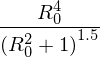

In [2]:
init_printing(use_latex=True)
R0 = symbols("R0")
#eq = m*g*sin(phi(t))*(r*w**2*cos(phi(t))/g -1)/b
Lz_2= R0**4/(R0**2+1)**(3/2)
Lz_2

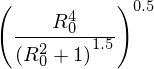

In [3]:
init_printing(use_latex=True)
R0 = symbols("R0")
Lz_= (R0**4/(R0**2+1)**(3/2))**(1/2)
Lz_

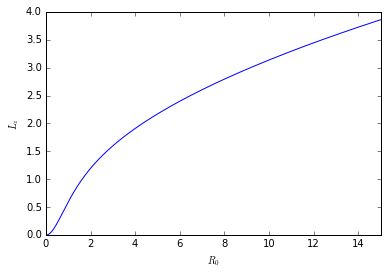

In [4]:
Lz=lambdify(R0, Lz_, "numpy")
R_vals=np.linspace(0,15,500)
plt.plot(R_vals, Lz(R_vals))
plt.xlim(0, 15)
plt.ylim(0, 4)
plt.xlabel("$R_{0}$")
plt.ylabel("$L_{z}$")

## Órbita circular
Escogiendo la órbita correspondiente a las coordenadas $(2,1.196)$, observamos a continuación que este punto corresponderá a un mínimo en la gráfica del potencial efectivo como se mostrará a continuación

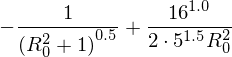

In [5]:
init_printing(use_latex=True)
R0, LL = symbols("R0 LL")

#eq = m*g*sin(phi(t))*(r*w**2*cos(phi(t))/g -1)/b
Lz_=Lz_.subs({R0:2})
Lz_2=Lz_**2
Phieff= -(1/(R0**2+1)**(1/2))+(Lz_2 /(2*R0**2))
Phieff



/home/oswaldo/anaconda3/lib/python3.5/site-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """


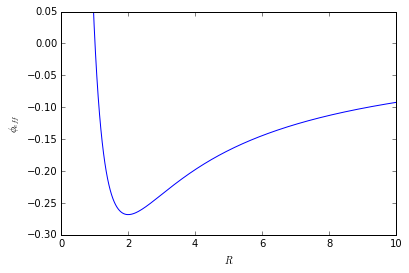

In [6]:
Phieff_=lambdify(R0, Phieff, "numpy")
R_vals=np.linspace(0,10,500)
plt.plot(R_vals, Phieff_(R_vals))
plt.xlim(0, 10)
plt.ylim(-0.3, 0.05)
plt.xlabel("$R$")
plt.ylabel("$\phi_{eff}$")

Por lo tanto, el mínimo en esta gráfica corresponde a una órbita circular con radio $2$ y una energía igual a $-0.268$. Para obtener esta órbita, se resolverá la ecuación de movimiento dada por
$$\ddot{\tilde{R}}_{0}=\frac{\tilde{L}_{z}^{2}}{\tilde{R}^{3}}-\frac{\tilde{R}}{(\tilde{R}^{2}+1)^{\frac{3}{2}}},$$
con condiciones iniciales $\tilde{R}_{0}=2$ y $\dot{\tilde{R} }=0$.

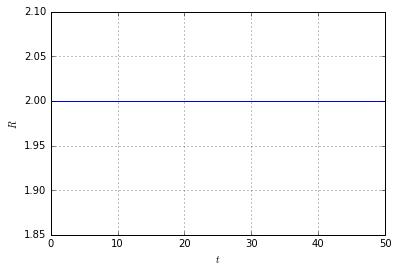

In [7]:
def orb(y, t):
    R, theta = y
    dydt = [((16/5**(1.5))/R**3) - R/(R**2 + 1)**(3/2), (16/5**(1.5))**(1/2)/R**2]
    return dydt

y0=[2, 0]
t=np.linspace(0, 50, 1000)
a = 1.2
sol=odeint(orb, y0, t)

x=sol[:,0]*np.cos(sol[:, 1])
y=sol[:,0]*np.sin(sol[:, 1])
plt.plot(t, sol[:, 0], 'b', label='R(t)')
#plt.plot(t, sol[:, 1], 'g', label='omega(t)')
#plt.plot(x,y)
plt.xlabel("$t$")
plt.ylabel("$R$")
plt.grid()
plt.show()

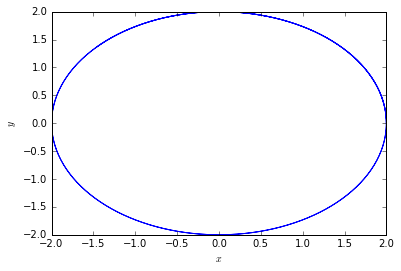

In [8]:
plt.plot(x,y)
plt.xlabel("$x$")
plt.ylabel("$y$")


Se observa que la solución muestra que la coordenada radial en función del tiempo permanece constante ya que se tiene una órbita circular.  
## ESTABILIDAD RADIAL DE  LAÓRBITA CIRCULAR

Para determinar numéricamente si la órbita es estable o no, se resuelve de nuevo la ecuación de movimiento, pero esta vez se cambia la condición inicial correspondiente a la posición con el fin de introducir una perturbación, a continuación se muestran los resultados obtenidos

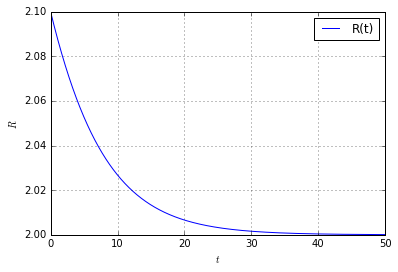

In [9]:
def orbpert(y, t):
    R, theta = y
    dydt = [((16/5**(1.5))/R**3) - R/(R**2 + 1)**(3/2), (16/5**(1.5))**(1/2)/R**2]
    return dydt

y0=[2.1, 0]
t=np.linspace(0, 50, 1000)
sol1=odeint(orbpert, y0, t)

x1=sol1[:,0]*np.cos(sol1[:, 1])
y1=sol1[:,0]*np.sin(sol1[:, 1])
plt.plot(t, sol1[:, 0], 'b', label='R(t)')
plt.legend(loc='best')
plt.xlabel("$t$")
plt.ylabel("$R$")
plt.grid()
plt.show()

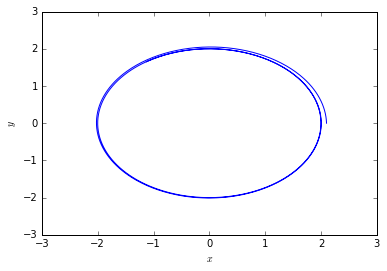

In [10]:
plt.plot(x1,y1)
plt.xlabel("$x$")
plt.ylabel("$y$")

Se concluye que la órbita es estable, porque bajo esta perturbación, la solución obtenida muestra que la partícula de prueba vuelve a la órbita circular, lo que equivale a oscilar alrededor del punto de equilibrio mostrado en la gráfica del potencial efectivo.

## Comentarios generales
Con el fin de obtener resultados que puedan representar resultados astrofísicos, en la normalización de la ecuación de movimiento se tomaron los valores para para $G$, $a$ y $M$ de la siguiente manera
$$G=6.75*10^{-11} \frac{m^{3}}{kgs^{2}}$$
$$a=1Kpc=3*10^{19}m$$
$$M=10^{11}M_{\odot}\approx 2*10^{41}kg$$
el cual determinan la escala de tiempo de los resultados obtenidos, conocida como el tiempo característico $t_{c}=(a^{3}/GM)^{(1/2)}$, cuyo valor es
$$t_{c}=4.4721*10^{13}s=1.4181*10^{6}años$$


## Animación

A continuación se presentan las animaciones de las trayectorias que traza la partícula de prueba, sin perturbación y con perturbación respectivamente.

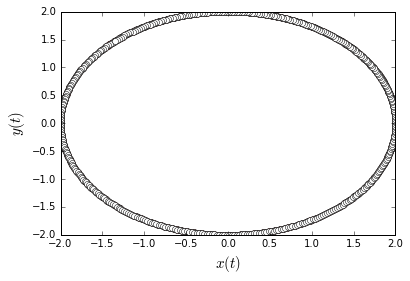

In [11]:
fig=plt.figure()
t_interval = np.arange(0,50,.05)
plt.plot(x,y,'w-');
p,=plt.plot(x,y,'bo')
p1,=plt.plot(x,y,'ro')
p2,=plt.plot(x,y,'wo')
plt.xlabel("$x(t)$",size=15)
plt.ylabel("$y(t)$",size=15)
def update(i):
    p.set_data(x[:i],y[:i])
    p1.set_data(x[:i-1],y[:i-1])
    p2.set_data(x[:i-5],y[:i-5])
ani = animation.FuncAnimation(fig, update, np.arange(len(t_interval)))
ani.save("orb.mp4", writer="ffmpeg", fps=10, bitrate=1800)

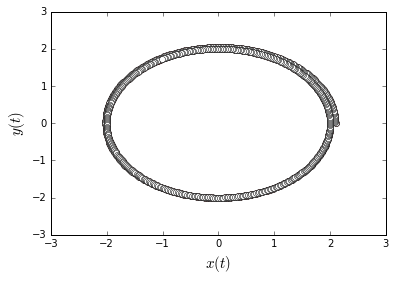

In [12]:
fig=plt.figure()
t_interval = np.arange(0,50,.05)
plt.plot(x1,y1,'w-');
p,=plt.plot(x1,y1,'bo')
p1,=plt.plot(x1,y1,'ro')
p2,=plt.plot(x1,y1,'wo')
plt.xlabel("$x(t)$",size=15)
plt.ylabel("$y(t)$",size=15)
def update(i):
    p.set_data(x1[:i],y1[:i])
    p1.set_data(x1[:i-1],y1[:i-1])
    p2.set_data(x1[:i-5],y1[:i-5])
ani = animation.FuncAnimation(fig, update, np.arange(len(t_interval)))
ani.save("orb1.mp4", writer="ffmpeg", fps=10, bitrate=1800)